In [3]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [10]:
def image_plot(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs[:5]]
    
    plt.figure(figsize=(12,14))
    
    for idx, img_path in enumerate(item_files):
        plt.subplot(5,5,idx+1)
        
        img=plt.imread(img_path)
        plt.tight_layout()
        plt.imshow(img, cmap='gray')

In [11]:
import os

In [12]:
print(os.listdir('Garbage classification/Garbage classification'))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [13]:
data_path = 'Garbage classification/Garbage classification'

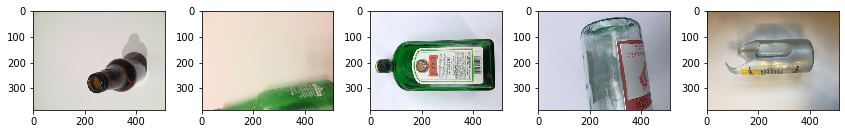

In [16]:
image_plot(data_path+'/glass')

In [18]:
train = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, validation_split=0.1, rescale=1./255,
                           shear_range=0.1,zoom_range=0.1, width_shift_range=0.1,height_shift_range=0.1)

test = ImageDataGenerator(rescale=1./255, validation_split=0.1)

In [19]:
train_generator = train.flow_from_directory(data_path,target_size=(300,300),batch_size=32, class_mode='categorical',
                                            subset='training')

test_generator = test.flow_from_directory(data_path,target_size=(300,300),batch_size=32, class_mode='categorical',
                                            subset='validation')

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [20]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [21]:
model = Sequential()

In [23]:
model.add(Conv2D(32,(3,3),padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 32)        1

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model_path='garbage_model.h5'
checkpoint1 = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [27]:
step_size_train = train_generator.n//train_generator.batch_size
step_size_test = test_generator.n//test_generator.batch_size

In [28]:
history=model.fit_generator(train_generator, epochs=100, steps_per_epoch=step_size_train, validation_data=test_generator,
                           validation_steps=step_size_test, callbacks=callbacks_list)

Epoch 1/100
70/71 [============================>.] - ETA: 7s - loss: 1.6877 - accuracy: 0.2423 
Epoch 00001: val_accuracy improved from -inf to 0.24107, saving model to garbage_model.h5
71/71 [==============================] - 558s 8s/step - loss: 1.6869 - accuracy: 0.2415 - val_loss: 1.7199 - val_accuracy: 0.2411
Epoch 2/100
70/71 [============================>.] - ETA: 5s - loss: 1.5730 - accuracy: 0.3250 
Epoch 00002: val_accuracy improved from 0.24107 to 0.36607, saving model to garbage_model.h5
71/71 [==============================] - 434s 6s/step - loss: 1.5693 - accuracy: 0.3284 - val_loss: 1.4119 - val_accuracy: 0.3661
Epoch 3/100
70/71 [============================>.] - ETA: 6s - loss: 1.4682 - accuracy: 0.3856 
Epoch 00003: val_accuracy improved from 0.36607 to 0.37500, saving model to garbage_model.h5
71/71 [==============================] - 476s 7s/step - loss: 1.4674 - accuracy: 0.3864 - val_loss: 1.4862 - val_accuracy: 0.3750
Epoch 4/100
70/71 [===========================

70/71 [============================>.] - ETA: 6s - loss: 1.0220 - accuracy: 0.5982 
Epoch 00028: val_accuracy improved from 0.64286 to 0.65179, saving model to garbage_model.h5
71/71 [==============================] - 441s 6s/step - loss: 1.0219 - accuracy: 0.5990 - val_loss: 1.0371 - val_accuracy: 0.6518
Epoch 29/100
70/71 [============================>.] - ETA: 5s - loss: 0.9917 - accuracy: 0.6200 
Epoch 00029: val_accuracy improved from 0.65179 to 0.66071, saving model to garbage_model.h5
71/71 [==============================] - 427s 6s/step - loss: 0.9944 - accuracy: 0.6196 - val_loss: 1.0017 - val_accuracy: 0.6607
Epoch 30/100
70/71 [============================>.] - ETA: 5s - loss: 0.9271 - accuracy: 0.6424 
Epoch 00030: val_accuracy improved from 0.66071 to 0.67411, saving model to garbage_model.h5
71/71 [==============================] - 433s 6s/step - loss: 0.9273 - accuracy: 0.6408 - val_loss: 1.0160 - val_accuracy: 0.6741
Epoch 31/100
70/71 [============================>.] -

Epoch 57/100
70/71 [============================>.] - ETA: 5s - loss: 0.7229 - accuracy: 0.7328 
Epoch 00057: val_accuracy improved from 0.73661 to 0.77232, saving model to garbage_model.h5
71/71 [==============================] - 434s 6s/step - loss: 0.7231 - accuracy: 0.7331 - val_loss: 0.7604 - val_accuracy: 0.7723
Epoch 58/100
70/71 [============================>.] - ETA: 5s - loss: 0.7452 - accuracy: 0.7265 
Epoch 00058: val_accuracy did not improve from 0.77232
71/71 [==============================] - 430s 6s/step - loss: 0.7490 - accuracy: 0.7233 - val_loss: 0.8518 - val_accuracy: 0.7500
Epoch 59/100
70/71 [============================>.] - ETA: 5s - loss: 0.7663 - accuracy: 0.7387 
Epoch 00059: val_accuracy did not improve from 0.77232
71/71 [==============================] - 433s 6s/step - loss: 0.7664 - accuracy: 0.7393 - val_loss: 0.8304 - val_accuracy: 0.7545
Epoch 60/100
70/71 [============================>.] - ETA: 5s - loss: 0.7609 - accuracy: 0.7346 
Epoch 00060: val_ac

Epoch 86/100
70/71 [============================>.] - ETA: 6s - loss: 0.5931 - accuracy: 0.7952 
Epoch 00086: val_accuracy did not improve from 0.78571
71/71 [==============================] - 443s 6s/step - loss: 0.5927 - accuracy: 0.7955 - val_loss: 0.7703 - val_accuracy: 0.7545
Epoch 87/100
70/71 [============================>.] - ETA: 5s - loss: 0.5951 - accuracy: 0.7929 
Epoch 00087: val_accuracy did not improve from 0.78571
71/71 [==============================] - 433s 6s/step - loss: 0.5917 - accuracy: 0.7937 - val_loss: 0.8168 - val_accuracy: 0.7634
Epoch 88/100
70/71 [============================>.] - ETA: 5s - loss: 0.5797 - accuracy: 0.7857 
Epoch 00088: val_accuracy did not improve from 0.78571
71/71 [==============================] - 431s 6s/step - loss: 0.5805 - accuracy: 0.7879 - val_loss: 0.8584 - val_accuracy: 0.7589
Epoch 89/100
70/71 [============================>.] - ETA: 5s - loss: 0.5393 - accuracy: 0.8002 
Epoch 00089: val_accuracy did not improve from 0.78571
71

In [29]:
score = model.evaluate_generator(test_generator, steps=step_size_test)
print(score)

[0.6807011408465249, 0.79910713]


In [31]:
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = C:\Users\RESTIN~1\AppData\Local\Temp\1

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\RESTIN~1\AppData\Local\Temp\1\assets

Saved model:


'ls' is not recognized as an internal or external command,
operable program or batch file.
